# Word Cloud for Amharic Content

This notebook walks you through generating some word clouds 

In [33]:
#imports
import pdfParser as pp
import commentsParser as cp
import commentsParser as cp
from pdfParser import clean_text

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
#import warnings
#warnings.filterwarnings('ignore')

## 1. generating word cloud from pdf book
first read the text from pdf, the book can be from downloaded path or from url

In [57]:
book_url = 'http://www.alemayehu.org/wp-content/uploads/2016/09/Web-%E1%8B%A8%E1%8C%88%E1%89%A0%E1%89%B3-%E1%8B%88%E1%8C%8E%E1%89%BD.pdf'
text = pp.parse_pdf(book_url)
text[50:60]

2019-01-03 01:27:10,154 [MainThread  ] [INFO ]  Retrieving http://www.alemayehu.org/wp-content/uploads/2016/09/Web-%E1%8B%A8%E1%8C%88%E1%89%A0%E1%89%B3-%E1%8B%88%E1%8C%8E%E1%89%BD.pdf to C:\Users\milli\AppData\Local\Temp/http-www-alemayehu-org-wp-content-uploads-2016-09-web-e1-8b-a8-e1-8c-88-e1-89-a0-e1-89-b3-e1-8b-88-e1-8c-8e-e1-89-bd-pdf.


['ዶሮዋ', 'በከተማ', 'ይሰጣል', 'እንጂ', 'አይሸጥም', 'የባሰ', 'አለ', 'ንጉሡን', 'አሳዩኝ', 'ይቅር']

remove stop words

In [22]:
stop_words = open('data\stopwords.txt', encoding='utf-8').read().split()
filtered_text_list = [val for val in text if val not in stop_words]
filtered_text = ' '.join(filtered_text_list)
filtered_text_list[:10]

['የገበታ', 'ወጎች', 'ከፍቅር', 'ካፌ', 'ዓለማየሁ', 'ማሞ', 'ዋሽንግተን', 'ዲ', 'ሲ', 'የገበታ']

Frequencies of words in the book

Text(0.5, 0, 'samples')

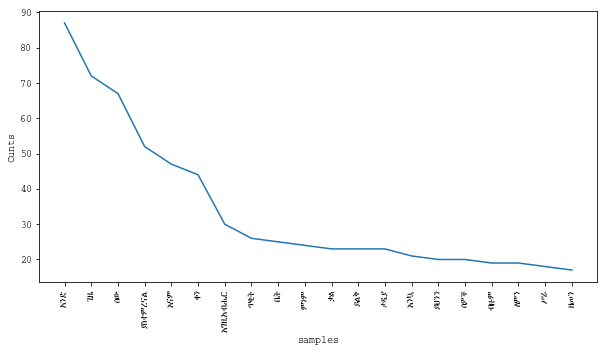

In [24]:
#for font issues
#add the font name to Lib\site-packages\matplotlib\mpl-data\matplotlibrc
#https://jdhao.github.io/2018/04/08/matplotlib-unicode-character/
counter = Counter(filtered_text_list)
df_common = pd.DataFrame(counter.most_common(20),columns=['word','freq'])
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(df_common.word,df_common.freq)
plt.rc('font', family='Ethiopia Jiret')
plt.rcParams.update({'font.size': 14})
plt.ylabel("Cunts")
plt.xlabel("samples")

generating the word cloud

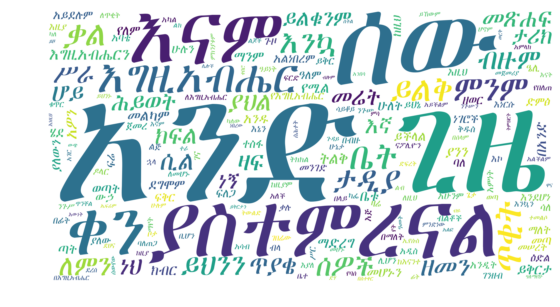

In [28]:
wordcloud = WordCloud(font_path='fonts\jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(filtered_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
#uncoment to save the image
#plt.savefig('examples\\am_book.png',dpi=600)

## 2. generating word cloud from YouTube comments
the comments are in data folder

In [30]:
#raw comments
comments = pd.read_csv('data\yt_comments.csv')
comments.tail()

,comment,id
4035,tedi film alserahum nwe yalkew kezihe yebelt a...,yt_17
4036,አንተ እንዴት ያለህ ደነዝ ነህ የኔን ስም አይቶነው የረዳው ትላለህ ማፈር...,yt_17
4037,ቴዲ ሙሉ በሙሉ ስተተኛ ነህ ። 1ኛ/ ልዩነትህን በቃለ ጉባኤ ማስቀመጥ ት...,yt_17
4038,የሞተውን ነብስይማር ገዘቡን ስትታሞ ገዘብ ያጣአለ ስጡት የሞተው ሀውልት ...,yt_17
4039,Birrun asetm ende tada le komitew ante bchahn ...,yt_17


In [31]:
#remove non-amharic comments
comments_filtered = cp.filter_latin(comments)
comments_filtered.tail()

,comment,id
4033,በሕይወቴ እስካሁን ከሀገሬ ከወጣው በጣም የሚያሳዝን ታራኮች እሰማለው ለመ...,yt_17
4034,ቴዲ ሌላ የግል ችግር ካለብህከኮሚቴው ጋ ሌላ ጉዳይ ነው የምትናገረው ሁሉ...,yt_17
4036,አንተ እንዴት ያለህ ደነዝ ነህ የኔን ስም አይቶነው የረዳው ትላለህ ማፈር...,yt_17
4037,ቴዲ ሙሉ በሙሉ ስተተኛ ነህ ። 1ኛ/ ልዩነትህን በቃለ ጉባኤ ማስቀመጥ ት...,yt_17
4038,የሞተውን ነብስይማር ገዘቡን ስትታሞ ገዘብ ያጣአለ ስጡት የሞተው ሀውልት ...,yt_17


In [34]:
#clean for numbers and special characters and convert to list
comment_words_list = clean_text(' '.join(comments_filtered.comment.tolist()))

In [35]:
#stop words
stop_words = open('data\stopwords.txt', encoding='utf-8').read().split()

In [36]:
#removing stop words
filtered_text_list = [val for val in comment_words_list if val not in stop_words]
comment_text = ' '.join(filtered_text_list)

Frequencies of words in the comments

Text(0.5, 0, 'samples')

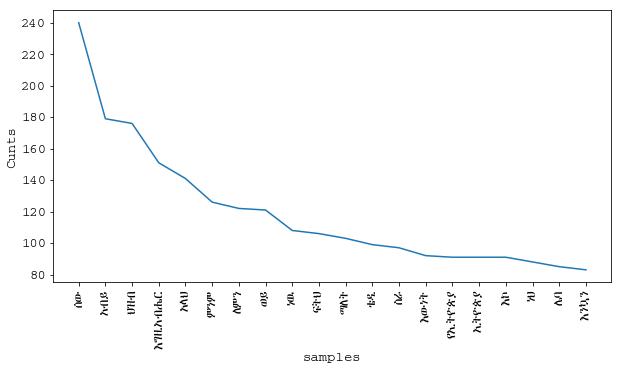

In [38]:
counter = Counter(filtered_text_list)
df_common = pd.DataFrame(counter.most_common(20),columns=['word','freq'])
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(df_common.word,df_common.freq)
plt.rc('font', family='Ethiopia Jiret')
plt.rcParams.update({'font.size': 14})
plt.ylabel("Cunts")
plt.xlabel("samples")

generating the word cloud

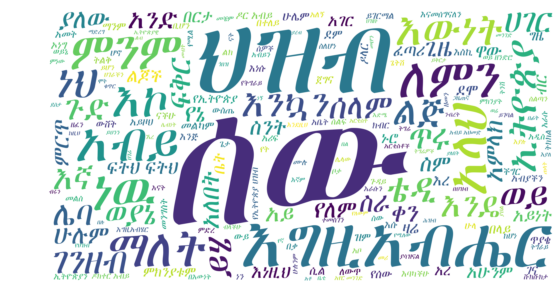

In [40]:
wordcloud = WordCloud(font_path='fonts\jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=True,
                      margin=2
                      ).generate(comment_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig('examples\\comments1.png',dpi=600)

## 3. generating word cloud for the holy bible

In [42]:
the_bible_url = 'http://bible.geezexperience.com/amharic/download/AmharicBible.pdf'
text = pp.parse_pdf(the_bible_url)

2019-01-03 01:21:42,050 [MainThread  ] [INFO ]  Retrieving http://bible.geezexperience.com/amharic/download/AmharicBible.pdf to C:\Users\milli\AppData\Local\Temp/http-bible-geezexperience-com-amharic-download-amharicbible-pdf.


In [49]:
#removing stop words
stop_words = open('data\stopwords.txt', encoding='utf-8').read().split()
filtered_text_list = [val for val in text if val not in stop_words]
filtered_text = ' '.join(filtered_text_list)
filtered_text_list[11:20]

['ኦሪት', 'ዘፍጥረት', 'በመጀመሪያ', 'እግዚአብሔር', 'ሰማይንና', 'ምድርን', 'ፈጠረ', 'ምድርም', 'ባዶ']

Frequencies of words in the bible

Text(0.5, 0, 'samples')

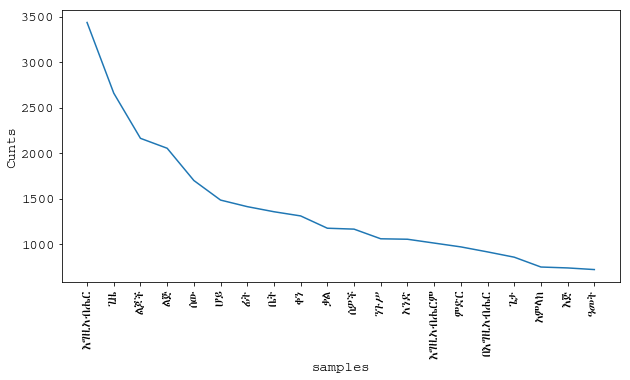

In [50]:
counter = Counter(filtered_text_list)
df_common = pd.DataFrame(counter.most_common(20),columns=['word','freq'])
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(df_common.word,df_common.freq)
plt.rc('font', family='Ethiopia Jiret')
plt.rcParams.update({'font.size': 14})
plt.ylabel("Cunts")
plt.xlabel("samples")

generate the word cloud

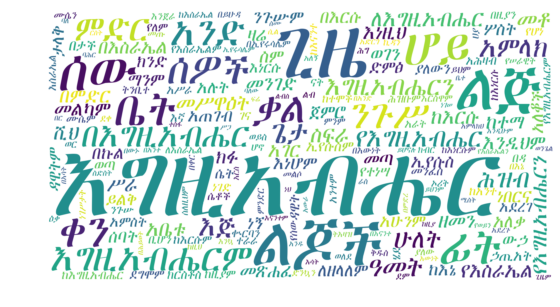

In [53]:
wordcloud = WordCloud(font_path='fonts\jiretsl.ttf',
                      relative_scaling = 0.8,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(filtered_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig('examples\\the_bible2.png',dpi=600)